## Robust Bottom Line

### "Revenue - Cost = Profit"
#### Profit is, and should be the most single factor in determining a success of business. To simply put, high revenue with low cost will yield a successful business. 
##### Revenue management is critical for business with a fixed capacity, a highly disposable product and high fixed costs. Many firms put their effort to increase the top line by marketings, expansions, and product quality control. Assuming that these efforts can keep the top line strong, firms still need to keep the cost effective to derive net profit. Simple cost cutting will hemper the growth of top line. How would a firm market with no capital? Truly understanding your product demand and accurately anticipate and structure the supply and the cost that it entails, also translates to truly understanding why is the business successful or not. 

Jim Collins, business writer, points Rubbermaid for illustration of failed revenue control.

"In How the Mighty Fall, Collins offers the example of household item manufacturer, Rubbermaid.  The company took its much-admired levels of innovation to an extreme, aiming to introduce one new product to their range per day: a strategy that led it to create nearly 1,000 new products in just three years. But this innovation came at a cost: in pushing so hard for new products, Rubbermaid lost control of its costs and failed to meet orders. The lack of discipline undermined the innovations, and the company suffered a rapid decline until it was eventually taken over by a rival."

Read more at: https://www.blinkist.com/magazine/posts/the-10-commandments-of-business-from-jim-collins?utm_source=cpp"

### Predicting audience number on game to game base for Major League Baseball Teams

Most of the MLB teams expects tens of thousands of crowd each day. The number fluctuates for teams and each of them have varying trends and seasonality. The venue operates with maximum capacity, have multiple ways of generating revenue through food, beverage, and merchandise. How should teams prepare for their home game? With attendance estimation, can teams maximize the profit? What metrics should be looked at to assess the prediction?


What impacts the audience number for major league baseball? Baseball season experiences 162 games per each team in a span of a little less than 8 months. On top of that, each game requires more than three hours in most cases. Operating venue and events in such scale is non trivial. What better way to prepare for the ball game than predicting the amount of crowd 
you’d expect today?


Here, we are going to analyze and predict the number of attendance per each team in MLB. What are the factors that drives people to stadium? We are going to take two different approach to tackle this task. Are people more sensitive to the every-day results and game condition? Or are people more reactive to yearly performance that each team put up? Is there sequential effect in attendance number?


Micro Analysis with supervised machine learning: Taking attendance/game details data from 1990s to 2017 for each team and analyze & predict attendance for next game.


#### Dataset to work with:

1. Game by game data from 1990 to 2016, includes each game result details (obtained from Troy Harper, GA Alumni from Washington DC, https://github.com/tkh5044/portfolio)

2. Game by game data for 2017 from baseball-reference.com (example:https://www.baseball-reference.com/teams/LAA/2017-schedule-scores.shtml')

3. Game logs data for 2015 from retrosheet baseball (http://www.retrosheet.org/gamelogs/index.html) 

I initially obtained dataset #1 from web and reached out to Mr. Harper for permission and since his work was ealier on 2017, he gave me the source to scrap the 2017 data (data #2). For verifying purposes for NaNs, I obtained data #3

#### Data Cleaning

1. Features 'at', 'winning_pitcher', 'losing_pitcher','save','ten_game','box' got dropped
   - at: represents either home game or visiting game, only using home games. 
   - winning_pitcher, losing_pitcher, save: using pitchers and dummied them will create too much noise.
   - ten_game: recent ten game average got dropped since streak info and record is included.
   - box: every row was NaN
2. 'Attendance' had nearly 500 NaN values. Upon inspecting, apart from 4 rows, all of NaNs were recorded for double headers. The first double header included the info. Copy and swifted first game of double header and applied to the second game. 4 rows that had no info had issues with data collection or game itself. Upon validating with other datasets (retrosheet), it also had attendance for those days missing. Dropped four rows. 
3. 'innings' had NaNs where they played normal 9.0 inning games. The columns specifies if they had played more or less innings. 
4. 'streak' had one NaN value where it was the opening game. Filled it with 0. 
5. 'w_or_l' had categories where they added extra information to win or lose (i.e. if they went to extra innings), converted them to win, lose, tie and dummied them. 
6. 'record' is win-lose foramt, convert it to winning%
7. 'gb' had 'up + int' format for leading teams and postive int for trailing teams. Make negative value for trailing team.
8. Timestamp 'time' and 'date'
    - time: hr:min format, converted to total minutes played. 
    - date: made categorical columns year, month, weekday and dummied them (kept the original for EDA purposes) 
9. 'Streak' was '+' and '-' format with no scalars,repetition to signify the number of streaks, or both string '0' and integer 0 that meant the same no streaks. Converted it to scalar values and combined both zero columns for no streaks. 
10. 'attendance' is a string with comma within, converted it to scalar.
11. 'd_or_n' dummied them with time as a prefix. 
12. Go through similar steps for scrapped 2017 data.

##### After these steps, I split the data into teams
Why?
Each team are too different. Their stadiums have different maximum capacity, team base and royalty, the essense and culture of team playing, and most importantly, they are in different cities with different population, income, weather, accessibility.. I can go forever how this should be treated. Let's see how their trend lines differ. 

![boston_toronto_sandiego](img/year_trend_example.png)


Here are three teams' times series graph. The mean, variance, trends are all varying substantially. Boston is motly at its maximum capacity while Toronto hits peak with larger variance. San Diego is at a mean that is lower than boston but might be smilar to that of Toronto while not hitting the maximum values like Toronto does. Sample the data into teams not only increases the predictability by removing the nuances but also makes computation a lot lighter. 

#### More data cleaning/munging

1. Create a team data frame from the whole set
2. The data contained NaNs in first 5 games for 5 day moving average 'runs_ma' column. Create a separate time, run data frame to calculate the 5 game moving average and applied the values.
3. Features 'attendance','runs', 'runs_allowed', 'innings', 'time', 'result_L', 'result_T', 'result_W' shifted to the following home game. 
    - These features are the stats for that game. I want to see how people react to the results of the previous day. Apply these value to the following game implies it is indeed the previous day stats that impacts today's crowd. Filled thes with 0 for opening day games. Renamed attendance to last_attendance and kept original attendance for target feature. 
4. Created list for rival teams and added a bool feature of 'rival' signifying if the team is playing the rival team. 
5. Repeat same steps for 2017 data and combine them. 

#### Exploratory Data Analysis (EDA)

I will use Los Angeles Angels as an example.

##### Basic Statistics

![basic_stats](img/angels_basic.png)

Obviously, numerical datas are quite different in nature. Some have negative values and some have value that is better if less in scale (div_rank). This data needs to be scaled. Also featues like innings and runs show skewness, normalization is also needed.

##### Boxplot time against attendance

![box](img/angels_box.png)

From this plot, I learned that even with the same team, year to year does show some variances. I was on the fence of including year dummies since in reality, I will be only given a data that is not included in training data set since predicting for past is not useful here. I do feel the need of having features that captures the difference in years and went ahead and kept the year dummies. 

Another point was that there seems to be a outliers in the data. Upside outliers were detected pre 97 and lower end outlier from 2004. Angels Stadium underwent a renovation that shrinked their capacity in 1997. All these are relevant to capture the essen and history of Angels, will keep the outliers.

##### Numerical features distribution

![dist](img/angels_dist.png)

Most of the numerical features shown more of normal distribution other than ones with attendance information. Runs per game also seems to have a outlier but zero runs per game is possible for teams in very early stage of season, will keep all the values

##### Categorical feature point plot against attendance

![month](img/angels_month.png)
![weekday](img/angels_weekday.png)

This plot gives a one clear pattern for angels. You should expect more crowd early in the season and substantially less people will show up in the later stage of season. Attendance in later months were lower in any days of the week. This may be caused by the post-season faith is usually determined by late september, losing bit of exitement of going to the ball park. Easy inference to draw here is that Mon-Wed on october, expect very little crowd compared to mean.

##### Swarmplot plots for month, weekday categorical features

![swarm](img/angels_swarm.png)

![swarm2](img/angels_swarm_weekday.png)

From the plot, we can observe that all the games that took place in march was on Sunday. We can infer that these to be an opening game too. As we saw from the point plot, opening games and sundays tend to gather more crowds compared to mean and such interaction is seen here. All across the weekdays, we do see dominant patterns of distribution for jun, july, august games. 

##### Scatter plot of numerical features against attendance

![scatter](img/angels_scatter.png)

Numerical features for the most part does not seem to show distict linearlity or pattern with attendance. There are some correlation with last game attendance, which was expected since their sequence of distribtuoin is almost the same. No other features stands out as an indicative feature.

##### Residual plot of numerical features against attendance

![residual](img/angels_residual.png)

When there is a pattern or linearilty with residual plot, you can get a idea of how to transform the data. However, no numerical features show such pattern here. Last_attendance showed a bit of negative linear pattern but its cluster seems more distinct and best fit line here actually looks more of straight line with no angle. 

##### Heatmaps for numerical features

![heat](img/angels_heatmap.png)

From the heatmap, we can see that some features are correlated with one another. Especially featues like div_rank correlated with game back, runs per game and record. This shows that features do have redundancy, which is understandable since these stats do impact one another and they are calculated with same metrics sometimes. I will removed some of redundant features.

#### Modeling Outline

As it was seen from above EDAs, multilinearity exist amongst features and little correlations have been detected between target and feature. Some argue that data should be kept as it is with apt domain knowledge. Since there are some features that I do know that share same scalar to calculate (i.e. runs, runs_pg, runs_ma all use same integer for runs) and that might be redundant. However, my intuition is that we should keep all of them since we are taking more of micro approach and small nuances that those stats signify is important. How much the team scored yesterday and what is their average run in that entire season does give different measure of anticipation for fans. Moreover, I'd like to observe which features individually contributes to the prediction. 

Therefore, I am going to take multiple approach. I will conduct model fit with different features selections. I will be utilizing feature selection methods for parametric models and fit the condensed features into them. I will also utilize scaled raw data and fit them into non-parametric models. Some of them will be serve as a benchmark. Each additional model fit will tell us if each step indeed betters the performance metric. Let's explore and compare them.  

Performance Metric to be used:
    - R-squared will be used to assess the effectiveness of prediction. 
Models to be used:
    - Logistic Regression and Support Vector Mechine for variance inflation factor and ANOVA testing feature selected data. 
    - I used four different major algorithms for regression problems(Bagging Regressor, Decision Tree Regressor, Random Forest Regressor, Gradient Boosting Regressor) in order to compare each model's effectiveness in predicting attendance with different feature selections.    
Score outputs:

1. Predict every game attendance to be that same year's mean attendance. 
    - Ran R-squared with every game that the prediction was that year's average.    
2. Fit naive models to unprocessed, unscaled datas. 
3. Use all scaled, __not__ deskewed features for non-parametric models with GridSearchCV for optimal parameters with importance features.
4. Fit pipeline of scaled, deskewed data with Principal Component Analysis feature extraction and GridSearchCV parameters for optimization. 
    1. Feature Selection using VIF (dropping features with VIF factor bigger than 4) for parametric models
    
    2. Feature selction using ANOVA testing with interaction features added(dropping features with less than 0.05 p-value) for parametric models


##### Feature Selection / Model Fit

3A. VIF
    1. Create list of VIF Factors in descending order and select numerical feature 'div_rank' (4.478039) and 'gb'(4.475048) to be removed. 
    2. Run Principal Component Analysis and find n_component = 40 to be the point of diminishing return and by 48 it explains the whole data. 
    3. Train-Test split and fit the data into Logtistic Regression, Support Vector Machine pipeline.

3B. ANOVA Testing
    1. Grouped features 'div_rank','record','streak','gb' where they are related by the game results and created interaction features amongst four of them.
    2. Grouped features 'runs','runs_ma','runs_pg' where they share runs and created interaction features amongst them.
    3. Grouped features time','innings','runs_allowed' where they contribute to the duration of the game and created interaction features amongst them. 
    4. Add interaction features only along with bias column. 
    5. Run a f_regression on data and keep features that had lower than 0.05 of p-value. 
    6. Run PCA and found that n_component = 40 to be point of diminishing return and by 43 whole data is explained
    7. Train-Test split and fit the data into Logtistic Regression, Support Vector Machine pipeline.

##### Predict every game attendance to be that same year's mean attendance.

In [99]:
annual_mean_r2(angels_data)

0.55095722417884274

##### VIF Feature Selected Score

![vifpca](img/angels_vif_pca.png)

![vlf](img/angels_vif_score.png)

Rather strangely, most of the testing scores went down after scaling, deskewing and GridSearching. 

    -Bagging Regressor: Both Train and Test score went lower. 
    -Decision Tree Regressor: It was overfitting to the data before preprocessing. It learned a train score more properly but not well enough to derive good Test score. 
    -Random Forest Regressor: Also both Train and Test score went lower. 
    -Gradinet Boosting Regressor: While Train score went up, Test score decreased rather dramatically. 

###### WHY???

Possible answers:
1. Dropping features with VIF did not help 
    - It is possible that the features that were actually didn't add errors when running with algorithms that don't use coefficients like linear regression. This might be proved with better testing score with anova selected features. 
2. Scaling and deskewing didn't help
    - Although conceptially it shouldn't be the case but it is worth taking a look at the difference that scaling and deskewing on metrics. 
3. GridSearchCV parameters were not set correctly
    - After repeating GridSearch multiple times, I got rid of most of the overfitting component of the parameters for Gradient Boosting since it has shown more of overfitting characteristics(i.e. min_samples_leaf) and made sure all the ranges will at least contain the default parameter. This in theory should at least give same score as the naive fit. 
4. PCA demention reduction didn't help
    - Although 97% of data variance can explain by the component number 40, it might be that 3% could increase our scores. 

##### in order to inspect possible reason for #2, I fitted scaled, deskewed, whole data into the models. 

![sca_desk](img/angels_sca_fit.png)

With only scaling and deskewing, testing scores were dramatically improved. We find that it ____wasn't____ scaling and deskewing that caused decrease in performance. 

##### ANOVA testing Feature Selected Score

![anovapca](img/angels_anova_pca.png)

![anova](img/angels_anova_score.png)

In order to observe the difference PCA can have, I've ran both component number 40 and 43. While increasing the number of component increased most of the scores, we still do see the similar pattern of derease in metrics for Gradient Boosting regressor. 

#### Why did both feature selection performed worse in some model?

Although not in every model, here is the disconnect between the model selection and the feature selection method I chose. VIF and Anova Testing both utilize mean and variances of linear regrssion analysis amongst features. Error variance that each feature adds are more meaningful method to select feature in non-parametric models. This is beacuse non-parametric models have fixed coefficients that model adapts from data. The parametric model changes with newly introduced data and thus it is less static in creating algorithm. The parametric model here are utilize CART algorithm to find where the loss function gets minimized. There still could be other factors that came into play but in general, VIF and ANOVA testing doesn't make it a good feature engineering process for CART algorithms. 

##### Let's use non-parametric models with feature selected datas. 

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'))))
Feature top 10 ranking:
1. runs_pg (0.406917)
2. innings (0.072214)
3. div_rank (0.068995)
4. time_N (0.056173)
5. F (0.050541)
6. gb (0.029154)
7. 1995 (0.020684)
8. runs_ma (0.020156)
9. runs_allowed_ma (0.019153)
10. record (0.018615)


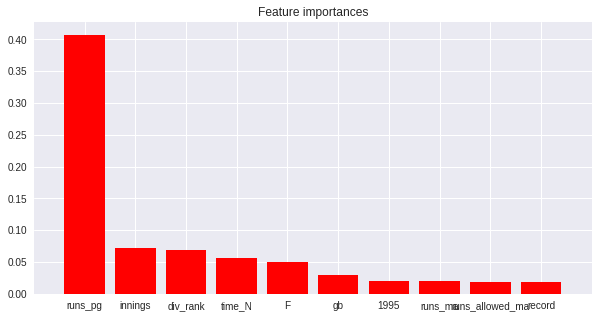

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False))))
Feature top 10 ranking:
1. runs_pg (0.362367)
2. innings (0.145132)
3. div_rank (0.060732)
4. F (0.049220)
5. time_N (0.030695)
6. gb (0.025765)
7. SA (0.021498)
8. streak (0.017528)
9. runs_ma (0.017262)
10. runs_allowed_ma (0.016974)


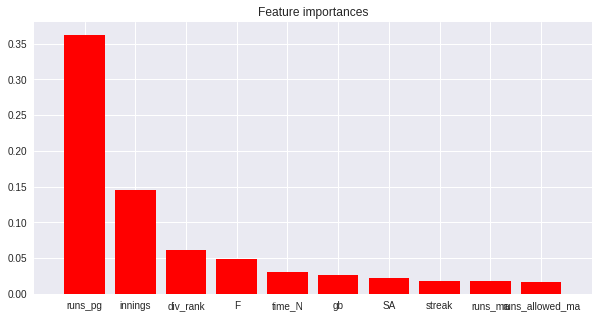

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
    ...       presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False))))
Feature top 10 ranking:
1. innings (0.108361)
2. runs_pg (0.084231)
3. div_rank (0.058421)
4. F (0.043848)
5. SA (0.040487)
6. gb (0.036422)
7. runs_allowed_ma (0.035627)
8. 1993 (0.030481)
9. 1995 (0.029044)
10. M (0.027925)


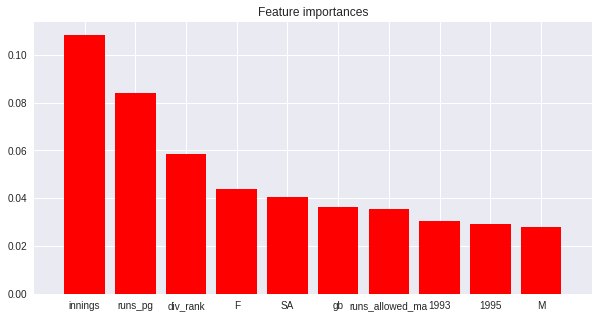

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
         verbose=0, warm_start=False))))
Feature top 10 ranking:
1. div_rank (0.316818)
2. double_header (0.187262)
3. gb (0.058194)
4. opening_day (0.051560)
5. record (0.034405)
6. runs_allowed_ma (0.024106)
7. runs_ma (0.022932)
8. runs_pg (0.019015)
9. streak (0.015864)
10. 1990 (0.015543)


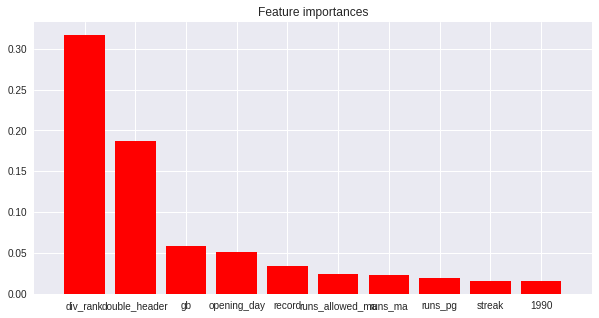

,preprocessed_train_score,preprocessed_test_score
Bagging_r2,0.936990,0.646506
Decision_tree_r2,1.000000,0.304297
Random_forest_r2,0.927374,0.632756
Gradient_boost_r2,0.794699,0.667941


In [214]:
score_feature_importance(feature_sca, target)

For Decision Tree regressor, the importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. The criterion used for naive fit was mean squared error. It is also known as the Gini importance. With testing score of 30%, 25% below benchmark, not sure how impacful it is but runs per game is the biggest factor by a big gap. Runs per game and number of innings were the most impacful factor. 

Random Forest much like decision tree does give feature importance, unlike the decision tree, each split is kept and their averaged prediction is given. Runs per game and number of innings was the big factor. 

Gradient Boosting just like bagging controls variance but also controls bias portion well. It combines a set of weak learners and delivers improved prediction accuracy. At any instant t, the model outcomes are weighed based on the outcomes of previous instant t-1. The outcomes predicted correctly are given a lower weight and the ones miss-classified are weighted higher. It trains many model sequentially. Each new model gradually minimizes the loss function. Innings and runs per game here seems to be the big factor of minimizing the loss function. 

Since Bagging regressor uses random estimators per each random subset of features to fit the model, it does not have feature importance computation. Bagging controls for high variance in a model with various estimator of choice. However, we are using decision tree, so I computed them separately. Division ranking and if the games was double header contributed impacted the number most. 

It is pretty clear that three models gave number of innings of previous game and how much a team scored on average followed by their division ranking. In my question of do people care more about the micro results of the each game or time-related factor, for Los Angeles Angels, it is the previous day stats that impacts the number of the attendance the most. 

Does it make sense with my domain knowledge? Division ranking, how well the team is doing in that year without a doubt makes the team more popular. People like to see their home team score, so runs per game could be a big factor. It is known that people tend to like offense than pitching games. 
You might think number of innings more random. I somewhat agree in that most of the baseball game is 9 inings match, but some games do go over and that has a pretty strong linearity with duration of time. Major League Baseball has been and put enourmous effort to limit the duration of the game by resticting clock time for each pitch prep, batting prep, intervals etc. (they rolled out a rule 2015 and new rule with even stricter time will roll out next year, 2018). 
